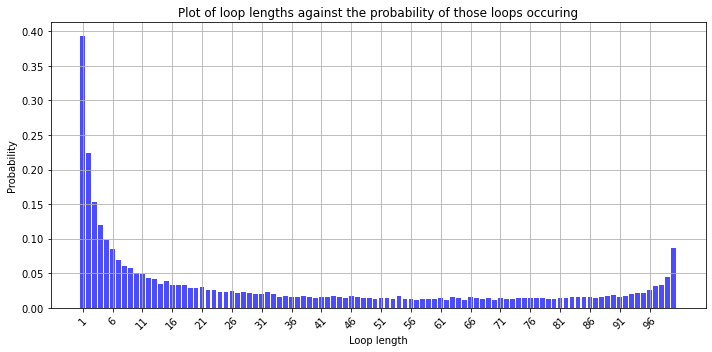

In [15]:
#Probability of a loop of certain length occurring.

from collections import defaultdict, Counter
import random
import matplotlib.pyplot as plt
import numpy as np

def loop_length_probabilities(N1, k1, trials):

    loop_length_count = Counter() 
    at_least_1loop=0

    for _ in range(trials):
        pairs = [{i, i + 1} for i in range(1, 2 * N1, 2)]
        ends = list(range(1, 2 * N1 + 1))
        lengths = set()

        for _ in range(k1):
            a, b = random.sample(ends, 2)
            ends.remove(a)
            ends.remove(b)

            set_a = next((s for s in pairs if a in s), None)
            set_b = next((s for s in pairs if b in s), None)

            if set_a == set_b:
                pairs.remove(set_a)
                loop_length = len(set_a) // 2
                lengths.add(loop_length)
            else:
                if set_a and set_b:
                    pairs.remove(set_a)
                    pairs.remove(set_b)
                    pairs.append(set_a.union(set_b))

        if lengths:
            at_least_1loop += 1
            for loop_length in lengths:
                loop_length_count[loop_length] += 1

    loop_length_prob = {
        l: count / at_least_1loop
        for l, count in loop_length_count.items()
    }

    return loop_length_prob

N1 = 100
k1 = 100
trials = 10000

loop_length_prob = loop_length_probabilities(N1, k1,trials)
loop_length_list, prob_list = zip(*sorted(loop_length_prob.items()))

plt.figure(figsize=(10, 5))
plt.bar(loop_length_list, prob_list, color='b', alpha=0.7)
plt.xlabel('Loop length')
plt.ylabel('Probability')
plt.title('Plot of loop lengths against the probability of those loops occuring')
plt.grid(True)
plt.xticks(loop_length_list[::5], rotation=45)
plt.tight_layout()
plt.show()



In [105]:
print('Probability of a loop of length 100 occuring:',prob_list[99])

100
Probability of a loop of length 100 occuring: 0.0889


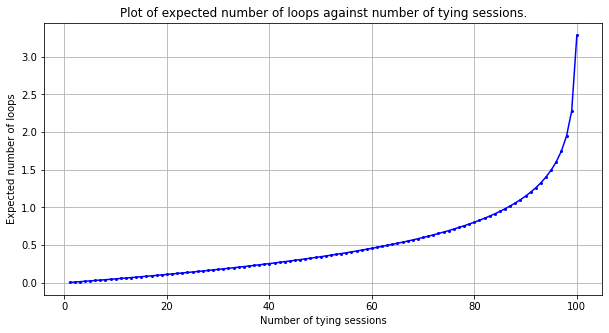

In [4]:
# Expected number of loops in k tying sessions when we orginally have 100 strings in the bowl.

import matplotlib.pyplot as plt
import numpy as np

def f(k):
    return sum(1/(2*100-2*(i-1)-1) for i in range(1,k+1))

k_values = np.arange(1, 101)
f_values = [f(k) for k in k_values]

plt.figure(figsize=(10, 5))
plt.plot(k_values, f_values, marker='o', markersize=2, linestyle='-', color='b')
plt.xlabel('Number of tying sessions')
plt.ylabel('Expected number of loops')
plt.title('Plot of expected number of loops against number of tying sessions.')
plt.grid(True)
plt.savefig("expected_loops.jpeg")
plt.show()

   

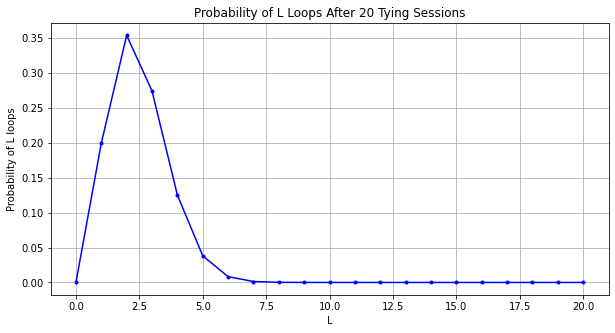

In [16]:
# Probability of having L loops in k tying sessions when we start off with N tying sessions.

from itertools import combinations
from math import prod
import matplotlib.pyplot as plt
import numpy as np

def probability_L_loops(k, L, N):

    all_indices = set(range(1, k + 1))
    total_probability = 0

    for P in combinations(all_indices, L):
        P = set(P)
        Y = all_indices - P
        C = {n: 2 * N - 2 * (n - 1) for n in all_indices}
        prod_P = prod(1 / (C[n] - 1) for n in P)
        prod_Y = prod(1 - (1 / (C[m] - 1)) for m in Y)
        total_probability += prod_P * prod_Y

    return total_probability

L_values = np.arange(1, 21)
probabilities = [probability_L_loops(20, L, 20) for L in L_values]
L_values = np.insert(L_values, 0, 0) 
probabilities.insert(0, prod(1-(1 / (40 - 2 * (n - 1) - 1)) for n in range(1, 21))) 

plt.figure(figsize=(10, 5))
plt.plot(L_values, probabilities, marker='o', markersize=3, linestyle='-', color='b')
plt.xlabel('L')
plt.ylabel('Probability of L loops')
plt.title('Probability of L Loops After 20 Tying Sessions')
plt.grid(True)
plt.show()



In [9]:
# Probability of number of loops in k tying sessions when we orginally have N strings in the bowl.

from itertools import combinations
from math import prod
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter

def simulate_partial_tying(N, k,trials=10000):
    loop_results = []

    for _ in range(trials):
        pairs = [{i, i + 1} for i in range(1, 2 * N, 2)]
        ends = [i for i in range(1, 2 * N + 1)] 

        loops = 0  

        for _ in range(k):
            a, b = random.sample(ends, 2)
            ends.remove(a)
            ends.remove(b)

            set_a = next((s for s in pairs if a in s), None)
            set_b = next((s for s in pairs if b in s), None)

            if set_a == set_b:
                pairs.remove(set_a)
                loops += 1 
            else:
                if set_a and set_b:
                    pairs.remove(set_a)
                    pairs.remove(set_b)
                    new_pair = set_a.union(set_b)
                    pairs.append(new_pair)

        loop_results.append(loops)
    loop_counts = Counter(loop_results)
    return loop_counts


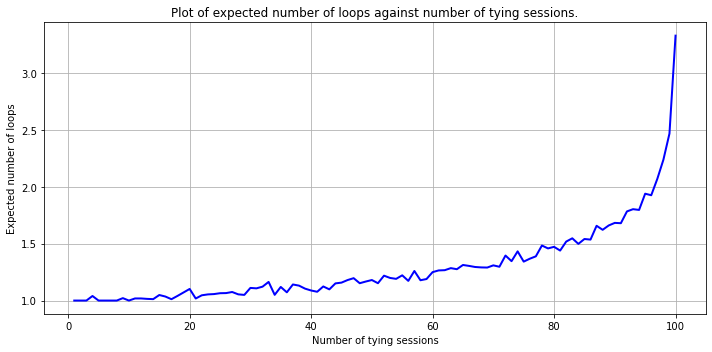

In [10]:
# Expected number of loops when we have we have the condition that there is at least 1 loop:

def conditional_loop_prob(loop_counts):
    
    total_trials = sum(loop_counts.values())
    probs = {l: count / total_trials for l, count in loop_counts.items()}
    alol = 1 - probs.get(0, 0)
    
    probs_c = {
        l: prob / alol
        for l, prob in probs.items()
        if l >= 1
    }

    return probs_c

def expected_value(x):
    return sum(value * prob for value, prob in x.items())

N2 = 100
trails2 = 1000
k2 = 100

expected_loops_list = []

for i in range(1, k2 + 1):
    loop_counts = simulate_partial_tying(N2, i, trails2)
    probs_c_k = conditional_loop_prob(loop_counts)
    expected_loops = expected_value(probs_c_k)
    expected_loops_list.append(expected_loops)

plt.figure(figsize=(10, 5))
plt.plot(range(1, k2 + 1), expected_loops_list, color='b', lw=2)
plt.xlabel('Number of tying sessions')
plt.ylabel('Expected number of loops')
plt.title('Plot of expected number of loops against number of tying sessions.')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Function that tells all the permuations in which 1 and 2 are beside each other.

import itertools

def permutations12():
    string_ends = [1, 2, 3, 4]
    results = []

    pairs = [(1, 2), (2, 1)]
    for pair in pairs:
        others = [x for x in string_ends if x not in pair]
        for perm in itertools.permutations(others):
            for i in range(len(perm) + 1):
                perm2 = list(perm[:i]) + list(pair) + list(perm[i:])
                results.append(tuple(perm2))

    return results

A = permutations12()
for p in A:
    print(p)

(1, 2, 3, 4)
(3, 1, 2, 4)
(3, 4, 1, 2)
(1, 2, 4, 3)
(4, 1, 2, 3)
(4, 3, 1, 2)
(2, 1, 3, 4)
(3, 2, 1, 4)
(3, 4, 2, 1)
(2, 1, 4, 3)
(4, 2, 1, 3)
(4, 3, 2, 1)


In [12]:
# We find the simulationed expected value of the number of loops formed of length 1.

import random

def loop_length_one(N, trials=10000):
    counter = 0

    for _ in range(trials):
        elements = list(range(1, 2 * N + 1))
        random.shuffle(elements)
        pairs = [set(elements[i:i+2]) for i in range(0, 2 * N, 2)]

        for n in range(1, N + 1):
            if {2 * n - 1, 2 * n} in pairs:
                counter += 1

    expected_value = counter / trials
    return expected_value

print('(N=10) Theoretical:',10 / (2 * 10 - 1), 'Simulated:', loop_length_one(10,10000))
print('(N=50) Theoretical:',50 / (2 * 50 - 1), 'Simulated:', loop_length_one(50,10000))
print('(N=75) Theoretical:',75 / (2 * 75 - 1), 'Simulated:', loop_length_one(75,10000))
print('(N=100) Theoretical:',100 / (2 * 100 - 1), 'Simulated:', loop_length_one(100,10000))


(N=10) Theoretical: 0.5263157894736842 Simulated: 0.5218
(N=50) Theoretical: 0.5050505050505051 Simulated: 0.5003
(N=75) Theoretical: 0.5033557046979866 Simulated: 0.5079
(N=100) Theoretical: 0.5025125628140703 Simulated: 0.4907


In [13]:
# We calculate the theoretical E[Z_k] values.

def theoretical_ezk(N, max_k):
    import numpy as np

    P = np.zeros((max_k + 1, N + 1))
    Z = np.zeros(max_k + 1)

    P[0][0] = 1 
    for k in range(1, max_k + 1):
        for i in range(N + 1):
            if i <= N - 1:
                P[k][i] += P[k - 1][i] * ((N - i - 1) / (2 * N - 2 * i - 1))
            if i >= 1:
                P[k][i] += P[k - 1][i - 1] * ((N - i + 1) / (2 * N - 2 * i + 1))
        Z[k] = Z[k - 1] + sum(P[k - 1][i] * (1 / (2 * N - 2 * i - 1)) for i in range(k))

    return Z

N = 50
Z = theoretical_ezk(N, max_k=N)

k_values = np.arange(1, N + 1)
theoretical_z_values = Z[1:N + 1]

In [14]:
# We find the simulated E[Z_k] values.

def simulated_ezk(N, max_k, trials=10000):
    Z_expectation = []

    for k in range(max_k + 1):
        total_loops = 0

        for _ in range(trials):
            pairs = [{2 * i, 2 * i + 1} for i in range(N)]
            ends = list(range(2 * N))
            loops = 0

            for _ in range(k):
                if len(ends) < 2:
                    break

                a, b = random.sample(ends, 2)
                if a % 2 == b % 2:
                    continue  

                ends.remove(a)
                ends.remove(b)
                set_a = next((s for s in pairs if a in s), None)
                set_b = next((s for s in pairs if b in s), None)

                if set_a == set_b:
                    pairs.remove(set_a)
                    loops += 1
                elif set_a and set_b:
                    pairs.remove(set_a)
                    pairs.remove(set_b)
                    new_pair = set_a.union(set_b)
                    pairs.append(new_pair)

            total_loops += loops
        Z_expectation.append(total_loops / trials)
    return Z_expectation

pure_simulated_Zk = simulated_ezk(N=50, max_k=50, trials=10000)
simulated_z_values = pure_simulated_Zk[1:]

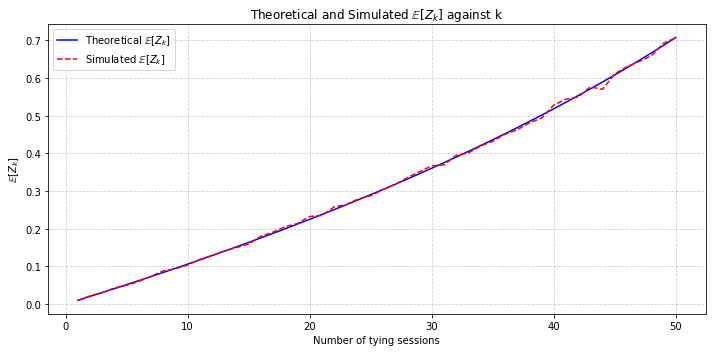

In [53]:
# We plot the simulated and theoretical E[Z_k] values against the number of tying sessions.

plt.figure(figsize=(10, 5))
plt.plot(k_values, theoretical_z_values, linestyle='-', color='blue', label='Theoretical $\\mathbb{E}[Z_k]$')
plt.plot(k_values, simulated_z_values, linestyle='--', color='red', label='Simulated $\\mathbb{E}[Z_k]$')
plt.xlabel('Number of tying sessions')
plt.ylabel('$\\mathbb{E}[Z_k]$')
plt.title('Theoretical and Simulated $\\mathbb{E}[Z_k]$ against k')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
